# Installs


In [66]:
!git clone https://github.com/DemisEom/SpecAugment.git
!pip install /content/SpecAugment/ --quiet
!pip install tensorflow-addons --quiet
!pip install sed_eval --quiet

Cloning into 'SpecAugment'...
remote: Enumerating objects: 271, done.
remote: Total 271 (delta 0), reused 0 (delta 0), pack-reused 271
Receiving objects: 100% (271/271), 429.45 KiB | 1.43 MiB/s, done.
Resolving deltas: 100% (150/150), done.
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [70]:
# install VGGish
!pip install numpy==1.21.6 resampy==0.2.2 tensorflow==2.8.2 tf_slim==1.1.0 six soundfile --quiet

# Clone TensorFlow models repo into a 'models' directory.
!git clone https://github.com/tensorflow/models.git

# Download data files into same directory as code.
!curl -O https://storage.googleapis.com/audioset/vggish_model.ckpt
!curl -O https://storage.googleapis.com/audioset/vggish_pca_params.npz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 71.5 MB/s eta 0:00:00


"\n# Clone TensorFlow models repo into a 'models' directory.\n!git clone https://github.com/tensorflow/models.git\n\n# Download data files into same directory as code.\n!curl -O https://storage.googleapis.com/audioset/vggish_model.ckpt\n!curl -O https://storage.googleapis.com/audioset/vggish_pca_params.npz\n"

In [64]:
!mv /content/vggish_model.ckpt /content/models/research/audioset/vggish
!mv /content/vggish_pca_params.npz /content/models/research/audioset/vggish

In [4]:
%cd /content/models/research/audioset/vggish
!python vggish_smoke_test.py
# If we see "Looks Good To Me", then we're all set.

/content/models/research/audioset/vggish

Testing your install of VGGish

Log Mel Spectrogram example:  [[-4.47303259 -4.29463765 -4.14939193 ... -3.97474254 -3.94778045
  -3.78685566]
 [-4.48592983 -4.28831745 -4.13994942 ... -3.98374974 -3.94981089
  -3.79512755]
 [-4.46165595 -4.29335712 -4.14907932 ... -3.96438562 -3.9489109
  -3.78621325]
 ...
 [-4.46165595 -4.29335712 -4.14907932 ... -3.96438562 -3.9489109
  -3.78621325]
 [-4.46165595 -4.29335712 -4.14907932 ... -3.96438562 -3.9489109
  -3.78621325]
 [-4.46165595 -4.29335712 -4.14907932 ... -3.96438562 -3.9489109
  -3.78621325]]
2023-04-23 22:32:39.713971: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.9/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `lay

# Imports

In [6]:
import glob
from zipfile import ZipFile
from tqdm import tqdm
import csv
import os
import random
import pandas as pd
import numpy as np
import tensorflow as tf
%cd /content/models/research/audioset/vggish
from vggish_input import wavfile_to_examples

/content/models/research/audioset/vggish


# Downloads

## Download Development Dataset (Train/Val) 

In [ ]:
def download_train_data():
  download_path = "/content/datasetZipped/"
  !mkdir $download_path
  # get first both audio set zips
  !wget https://zenodo.org/record/814831/files/TUT-sound-events-2017-development.audio.1.zip?download=1 -O {download_path}TUT-sound-events-2017-development.audio.1.zip
  !wget https://zenodo.org/record/814831/files/TUT-sound-events-2017-development.audio.2.zip?download=1 -O {download_path}TUT-sound-events-2017-development.audio.2.zip
  # download labels and related metadata
  !wget https://zenodo.org/record/814831/files/TUT-sound-events-2017-development.doc.zip?download=1 -O {download_path}TUT-sound-events-2017-development.doc.zip
  !wget https://zenodo.org/record/814831/files/TUT-sound-events-2017-development.meta.zip?download=1 -O {download_path}TUT-sound-events-2017-development.meta.zip


In [ ]:
# Download the actual data
download_train_data()

mkdir: cannot create directory ‘/content/datasetZipped/’: File exists
--2023-04-23 18:40:36--  https://zenodo.org/record/814831/files/TUT-sound-events-2017-development.audio.1.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1062653169 (1013M) [application/octet-stream]
Saving to: ‘/content/datasetZipped/TUT-sound-events-2017-development.audio.1.zip’

/content/datasetZip 100%[===================>]   1013M  6.34MB/s    in 11m 29s 

2023-04-23 18:52:07 (1.47 MB/s) - ‘/content/datasetZipped/TUT-sound-events-2017-development.audio.1.zip’ saved [1062653169/1062653169]

--2023-04-23 18:52:07--  https://zenodo.org/record/814831/files/TUT-sound-events-2017-development.audio.2.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response...

In [ ]:
def download_test_data():
  download_path = "/content/EvaluationZipped/"
  !mkdir $download_path
  # get the audio set zip
  !wget https://zenodo.org/record/1040179/files/TUT-sound-events-2017-evaluation.audio.zip?download=1 -O {download_path}TUT-sound-events-2017-evaluation.audio.zip  
  # download labels and related metadata
  !wget https://zenodo.org/record/1040179/files/TUT-sound-events-2017-evaluation.doc.zip?download=1 -O {download_path}TUT-sound-events-2017-evaluation.doc.zip
  !wget https://zenodo.org/record/1040179/files/TUT-sound-events-2017-evaluation.meta.zip?download=1 -O {download_path}TUT-sound-events-2017-evaluation.meta.zip

In [ ]:
download_test_data()

--2023-04-23 19:03:51--  https://zenodo.org/record/1040179/files/TUT-sound-events-2017-evaluation.audio.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388173790 (370M) [application/octet-stream]
Saving to: ‘/content/EvaluationZipped/TUT-sound-events-2017-evaluation.audio.zip’

/content/Evaluation 100%[===================>] 370.19M  19.0MB/s    in 21s     

2023-04-23 19:04:13 (17.3 MB/s) - ‘/content/EvaluationZipped/TUT-sound-events-2017-evaluation.audio.zip’ saved [388173790/388173790]

--2023-04-23 19:04:14--  https://zenodo.org/record/1040179/files/TUT-sound-events-2017-evaluation.doc.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55462 (54K) [application/octet-stream]
Saving to: ‘/content/Eval

# Preprocessing

## Unzip data


In [ ]:
def unzip_data(download_path, extract_path):
  # create glob
  final_glob = glob.glob(f"{download_path}*.zip")

  for zip_name in tqdm(final_glob):
    with ZipFile(zip_name, 'r') as zip:
      zip.extractall(extract_path)

In [ ]:
download_development_path = '/content/datasetZipped/'
extract_development_path = '/content/train'
download_test_path = '/content/EvaluationZipped/'
extract_test_path = '/content/test'

unzip_data(download_development_path, extract_development_path)
unzip_data(download_test_path, extract_test_path)

100%|██████████| 3/3 [00:03<00:00,  1.18s/it]


In [ ]:
# clean up folders

!mv /content/train/TUT-sound-events-2017-development /content/train/train
!mv /content/test/TUT-sound-events-2017-evaluation /content/test/test
!mkdir /content/data
!mv /content/train/train /content/data/train
!mv /content/test/test /content/data/test
!rm -r /content/test
!rm -r /content/train

mkdir: cannot create directory ‘/content/data’: File exists


## Parse all annotations

In [7]:
path = '/content/data/train/meta/street'
column_names = ['path', 'category', 'start_time', 'end_time', 'class', 'mixture', 'name']
dfs = []

for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    with open(file_path, 'r') as f:
        lines = f.readlines()
        data = [line.strip().split('\t') for line in lines]
        df = pd.DataFrame(data, columns=column_names)
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
wav_files = df['path'].unique()
print(wav_files)

print(df.info())
print(df['class'].value_counts())

['audio/street/a008.wav' 'audio/street/b009.wav' 'audio/street/b007.wav'
 'audio/street/a013.wav' 'audio/street/b006.wav' 'audio/street/b008.wav'
 'audio/street/a131.wav' 'audio/street/b094.wav' 'audio/street/a010.wav'
 'audio/street/b098.wav' 'audio/street/a124.wav' 'audio/street/a129.wav'
 'audio/street/b003.wav' 'audio/street/a003.wav' 'audio/street/a128.wav'
 'audio/street/b005.wav' 'audio/street/b100.wav' 'audio/street/b093.wav'
 'audio/street/b099.wav' 'audio/street/b095.wav' 'audio/street/a001.wav'
 'audio/street/b091.wav' 'audio/street/a012.wav' 'audio/street/a127.wav']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   path        729 non-null    object
 1   category    729 non-null    object
 2   start_time  729 non-null    object
 3   end_time    729 non-null    object
 4   class       729 non-null    object
 5   mixture     729 non-null  

In [8]:
print(df.head())

                    path category start_time    end_time            class  \
0  audio/street/a008.wav   street   0.184586    0.469855  people speaking   
1  audio/street/a008.wav   street  61.735534   64.957394   people walking   
2  audio/street/a008.wav   street  63.044415   63.514269  people speaking   
3  audio/street/a008.wav   street  86.201532  109.325089  people speaking   
4  audio/street/a008.wav   street  148.70897  152.182538              car   

   mixture  name  
0  mixture  a008  
1  mixture  a008  
2  mixture  a008  
3  mixture  a008  
4  mixture  a008  


Each sample in the mfcc represents 0.96 seconds of the input wav.

In [9]:
classes = df['class'].unique()
print('classes:', classes)

classes: ['people speaking' 'people walking' 'car' 'large vehicle' 'children'
 'brakes squeaking']


## Build dataset

In [10]:
def get_label_vector(start_frame, end_frame, wavfile):
  label_vector = [0] * len(classes)
  wavfile_rows = df[df['path'] == wavfile]

  # iterate over label sections in wav file
  for index, row in wavfile_rows.iterrows():
    start_label = float(row['start_time'])
    end_label = float(row['end_time'])
    class_label = row['class']
    if end_frame >= start_label and start_frame <= end_label:
      class_index = np.where(classes == class_label)[0][0]
      label_vector[class_index] = 1
  return label_vector

In [11]:
base_path = '/content/data/train/'
STEP_SIZE = 0.96 # seconds
examples = [] # list of (features, label) pairs
for wavfile in tqdm(wav_files):
  mfcc = wavfile_to_examples(base_path + wavfile)
  timestamp = 0.0
  frames = []
  for frame in mfcc:
    # add timestamps
    start_frame = timestamp
    end_frame = timestamp + STEP_SIZE
    row = [frame, get_label_vector(start_frame, end_frame, wavfile)] # will be populated later
    examples.append(row)
    timestamp += STEP_SIZE

100%|██████████| 24/24 [03:23<00:00,  8.47s/it]


In [12]:
print(len(examples[0][0]), len(examples[0][0][0]))

96 64


## Prepare Train, Test, Val

In [13]:
def split_train_test(data, split=0.8):
    num_train = int(len(data) * split)
    train_data = data[:num_train]
    test_data = data[num_train:]
    return train_data, test_data

In [20]:
random.shuffle(examples)

train, test = split_train_test(examples, 0.8)
train, val = split_train_test(train, 0.8)
X_train = [d[0] for d in train]
y_train = [d[1] for d in train]
X_val = [d[0] for d in val]
y_val = [d[1] for d in val]
X_test = [d[0] for d in test]
y_test = [d[1] for d in test]

# Training

### Training Imports

In [29]:
import tensorflow.compat.v1 as tf
import tf_slim as slim
import matplotlib.pyplot as plt

import vggish_input
import vggish_params
import vggish_slim

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
len(X_train)

3677

In [58]:
NUM_EPOCHS = 20
BATCH_SIZE = 32
NUM_BATCHES = len(X_train) // BATCH_SIZE
CHECKPOINT_PATH = '/content/models/research/audioset/vggish/vggish_model.ckpt'

In [59]:
def get_batch(i):
  start_index = i * BATCH_SIZE
  end_index = start_index + BATCH_SIZE
  return X_train[start_index:end_index], y_train[start_index:end_index]

Mostly copied from https://github.com/tensorflow/models/blob/ae2cf40897f19199166244397e384ca71104c5fd/research/audioset/vggish/vggish_train_demo.py (04/29/23)

In [62]:
with tf.Graph().as_default(), tf.Session() as sess:
    # Define VGGish.
    embeddings = vggish_slim.define_vggish_slim(training=True)

    # Define a shallow classification model and associated training ops on top
    # of VGGish.
    with tf.variable_scope('mymodel'):
      # Add a fully connected layer with 100 units. Add an activation function
      # to the embeddings since they are pre-activation.
      num_units = 100
      fc = slim.fully_connected(tf.nn.relu(embeddings), num_units)

      # Add a classifier layer at the end, consisting of parallel logistic
      # classifiers, one per class. This allows for multi-class tasks.
      logits = slim.fully_connected(
          fc, len(classes), activation_fn=None, scope='logits')
      tf.sigmoid(logits, name='prediction')

      # Add training ops.
      with tf.variable_scope('train'):
        global_step = tf.train.create_global_step()

        # Labels are assumed to be fed as a batch multi-hot vectors, with
        # a 1 in the position of each positive class label, and 0 elsewhere.
        labels_input = tf.placeholder(
            tf.float32, shape=(None, len(classes)), name='labels')

        # Cross-entropy label loss.
        xent = tf.nn.sigmoid_cross_entropy_with_logits(
            logits=logits, labels=labels_input, name='xent')
        loss = tf.reduce_mean(xent, name='loss_op')
        tf.summary.scalar('loss', loss)

        # We use the same optimizer and hyperparameters as used to train VGGish.
        optimizer = tf.train.AdamOptimizer(
            learning_rate=vggish_params.LEARNING_RATE,
            epsilon=vggish_params.ADAM_EPSILON)
        train_op = optimizer.minimize(loss, global_step=global_step)

    # Initialize all variables in the model, and then load the pre-trained
    # VGGish checkpoint.
    sess.run(tf.global_variables_initializer())
    vggish_slim.load_vggish_slim_checkpoint(sess, CHECKPOINT_PATH)

    train_losses = []
    val_losses = []
    metrics_val = {'accuracy': [],
                  'precision': [],
                  'recall': [],
                  'f1': []}
    for epoch in range(NUM_EPOCHS):
      # The training loop.
      features_input = sess.graph.get_tensor_by_name(
          vggish_params.INPUT_TENSOR_NAME)
      
      for i in range(NUM_BATCHES):
        features, labels = get_batch(i)
        num_steps, train_loss, _ = sess.run([global_step, loss, train_op], 
                                            feed_dict={features_input: features, 
                                                      labels_input: labels})
        print(f'\r[TRAIN]\tEpoch {epoch+1}, Step {num_steps}: loss {train_loss}', end='')

      print()
      # Compute metrics on validation set
      val_logits, val_loss = sess.run([logits, loss], 
                                      feed_dict={features_input: X_val,
                                                labels_input: y_val})
      val_predictions = tf.nn.sigmoid(val_logits)
      val_predictions = sess.run(val_predictions)
      val_predictions = np.round(val_predictions)
      accuracy = accuracy_score(y_val, val_predictions)
      precision = precision_score(y_val, val_predictions, average='micro')
      recall = recall_score(y_val, val_predictions, average='micro')
      f1 = f1_score(y_val, val_predictions, average='micro')

      train_losses.append(train_loss)
      val_losses.append(val_loss)
      metrics_val['accuracy'].append(accuracy)
      metrics_val['precision'].append(precision)
      metrics_val['recall'].append(recall)
      metrics_val['f1'].append(f1)
      print('[VAL]\tEpoch %d, Step %d: loss %g, accuracy %g, precision %g, recall %g, F1 %g' %
            (epoch+1, num_steps, val_loss, accuracy, precision, recall, f1))


/usr/local/lib/python3.9/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.9/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:332: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '


[TRAIN]	Epoch 1, Step 113: loss 0.25791457295417786
[VAL]	Epoch 1, Step 113: loss 0.333063, accuracy 0.465217, precision 0.677233, recall 0.46169, F1 0.549065
[TRAIN]	Epoch 2, Step 227: loss 0.19232462346553802
[VAL]	Epoch 2, Step 227: loss 0.30183, accuracy 0.479348, precision 0.668546, recall 0.582515, F1 0.622572
[TRAIN]	Epoch 3, Step 341: loss 0.17144690454006195
[VAL]	Epoch 3, Step 341: loss 0.289397, accuracy 0.495652, precision 0.670576, recall 0.617878, F1 0.643149
[TRAIN]	Epoch 4, Step 455: loss 0.14823924005031586
[VAL]	Epoch 4, Step 455: loss 0.279646, accuracy 0.513043, precision 0.674442, recall 0.653242, F1 0.663673
[TRAIN]	Epoch 5, Step 569: loss 0.12406153231859207
[VAL]	Epoch 5, Step 569: loss 0.274502, accuracy 0.522826, precision 0.681043, recall 0.666994, F1 0.673945
[TRAIN]	Epoch 6, Step 683: loss 0.11233233660459518
[VAL]	Epoch 6, Step 683: loss 0.276091, accuracy 0.534783, precision 0.699492, recall 0.676817, F1 0.687968
[TRAIN]	Epoch 7, Step 797: loss 0.09443388

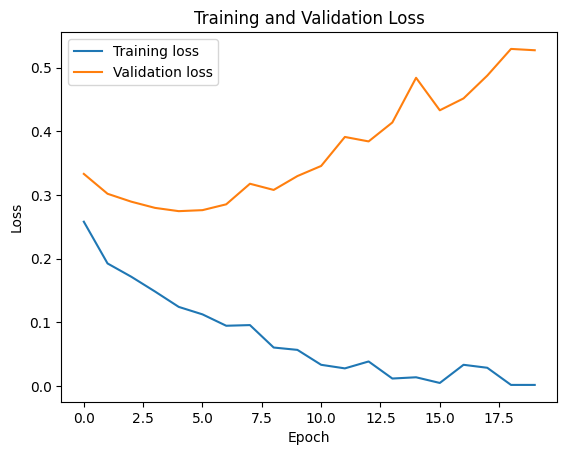

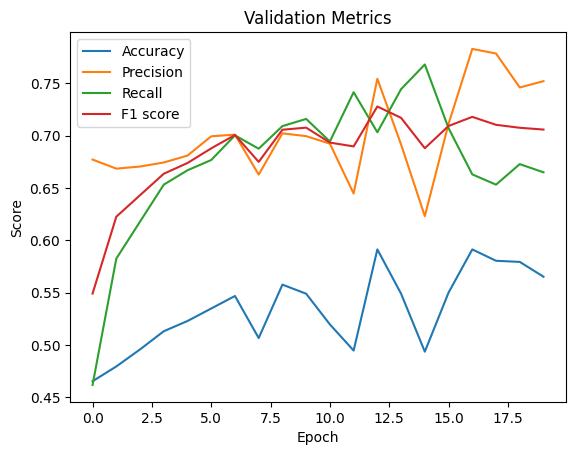

In [63]:
# Plot the training and validation losses
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the validation metrics
plt.plot(metrics_val['accuracy'], label='Accuracy')
plt.plot(metrics_val['precision'], label='Precision')
plt.plot(metrics_val['recall'], label='Recall')
plt.plot(metrics_val['f1'], label='F1 score')
plt.legend()
plt.title('Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()
